In [55]:
#Importando paquetes
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
import numpy as np
X, Y = make_classification(n_samples=50,
    n_features=3, n_redundant=0, n_informative=3, n_classes=2)

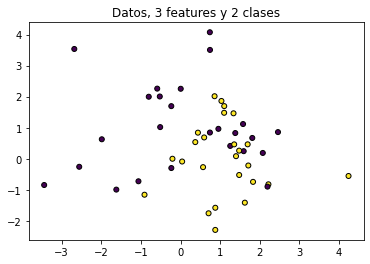

In [56]:
#Visualizando datos
import matplotlib.pyplot as plt
plt.title("Datos, 3 features y 2 clases", fontsize="large")
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="k")

In [57]:
#Train y Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
puntosAparte= np.array([[1, 0, 1]])

In [58]:
#Cambiandole de forma a los y (train y test)
ytrain2d = np.reshape(Y_train,(-1,1))
ytest2d = np. reshape(Y_test,(-1,1))

In [59]:
#Inicializar matriz
def initialize_nn(X):

  np.random.seed(999)

  w = np.random.randn(X.shape[1], 1) * 0.01
  b = 0

  return {'w': w, 'b': b}

In [60]:
#Forward feed
def forward_prop(X, params):

  w = params['w']
  b = params['b']

  z = np.dot(X, w) + b
  a = sigmoid(z)
  
  return {'z': z, 'a': a}

In [61]:
#Funcion de activacion
def sigmoid(Z):
  
  return 1/(1+np.power(np.e, -Z))

In [62]:
#Calcular Perdida

from scipy.special import xlogy


def calculate_loss(cache, y):


  a = cache['a']
  m = y.shape[0]

  return -1/m*np.sum(xlogy(y, a) + xlogy(1-y, 1-a))

In [63]:
#Backward proopagation
def backward_prop(X, y, cache):

  

  z = cache['z']
  a = cache['a']
  m = X.shape[0]

  dz = a - y
  dw = (1./m)*np.dot(X.T, dz)
  db = (1./m)*np.sum(dz)

  return {'dz': dz, 'dw': dw, 'db': db}

In [88]:
#Redefinir los pesos
def cambioPeso(params, changes, learning_rate=0.01):

  

  w = params['w']
  b = params['b']
  dw = changes['dw']
  db = changes['db']

  w -= learning_rate*dw
  b -= learning_rate*db

  return {'w': w, 'b': b}

In [65]:
#Entrenando la red
epochs = 1000
learning_rate = 5e-3

params = initialize_nn(X_train)

for i in range(epochs):
  cache = forward_prop(X_train, params)
  loss = calculate_loss(cache, ytrain2d)
  updates = backward_prop(X_train, ytrain2d, cache)
  params = cambioPeso(params, updates, learning_rate=learning_rate)

In [106]:
#Prediccion
from sklearn.metrics import accuracy_score
params= initialize_nn(X_train)
for i in range(epochs):
    cache= forward_prop(X_train, params)
    loss=calculate_loss(cache, ytrain2d)
    updates=backward_prop(X_train, ytrain2d,cache)
    params=cambioPeso(params, updates, learning_rate=learning_rate)
    
    if i%(epochs/10) == 0:
        print('Epoch: {}\tLoss:{:.5f}'.format(i,loss), end='')
        train_cache= np.where(cache['a']>0.5,1,0)
        print('\tTraining Accuracy:{:.5f}'.format(accuracy_score(ytrain2d, train_cache)), end='')
        test_cache = forward_prop(X_test,params)['a']
        test_cache = np.where(test_cache>=0.5,1,0)
        print('\tTesting accuracy:{:.5f}'.format(accuracy_score(ytest2d, test_cache)))

Epoch: 0	Loss:0.69474	Training Accuracy:0.40000	Testing accuracy:0.33333
Epoch: 100	Loss:0.61322	Training Accuracy:0.68571	Testing accuracy:0.60000
Epoch: 200	Loss:0.56657	Training Accuracy:0.68571	Testing accuracy:0.60000
Epoch: 300	Loss:0.53745	Training Accuracy:0.68571	Testing accuracy:0.60000
Epoch: 400	Loss:0.51788	Training Accuracy:0.68571	Testing accuracy:0.60000
Epoch: 500	Loss:0.50398	Training Accuracy:0.68571	Testing accuracy:0.60000
Epoch: 600	Loss:0.49366	Training Accuracy:0.68571	Testing accuracy:0.60000
Epoch: 700	Loss:0.48573	Training Accuracy:0.68571	Testing accuracy:0.60000
Epoch: 800	Loss:0.47946	Training Accuracy:0.68571	Testing accuracy:0.60000
Epoch: 900	Loss:0.47439	Training Accuracy:0.68571	Testing accuracy:0.60000


## Se observa una precision del 60%

In [118]:
#Prediccion usando nuevos puntos
from sklearn.metrics import accuracy_score
params= initialize_nn(puntosAparte)
for i in range(epochs):
    cache= forward_prop(puntosAparte, params)
    loss=calculate_loss(cache, ytrain2d)
    updates=backward_prop(X_train, ytrain2d,cache)
    params=cambioPeso(params, updates, learning_rate=learning_rate)
    
    if i%(epochs/10) == 0:
        print('Epoch: {}\tLoss:{:.5f}'.format(i,loss), end='')
        train_cache= np.where(cache['a']>0.5,1,0)
        print('\tTesting accuracy:{:.5f}'.format(accuracy_score(ytest2d, test_cache)))

Epoch: 0	Loss:0.69309	Testing accuracy:0.60000
Epoch: 100	Loss:0.69877	Testing accuracy:0.60000
Epoch: 200	Loss:0.71801	Testing accuracy:0.60000
Epoch: 300	Loss:0.74459	Testing accuracy:0.60000
Epoch: 400	Loss:0.77467	Testing accuracy:0.60000
Epoch: 500	Loss:0.80595	Testing accuracy:0.60000
Epoch: 600	Loss:0.83712	Testing accuracy:0.60000
Epoch: 700	Loss:0.86746	Testing accuracy:0.60000
Epoch: 800	Loss:0.89657	Testing accuracy:0.60000
Epoch: 900	Loss:0.92429	Testing accuracy:0.60000
